 # Investigar  los patrones de la rentabilidad de los productos de Whitewell

Los modelos lineales son una de las herramientas más importantes del análisis cuantitativo. Los utilizamos cuando queremos predecir –o explicar– una variable dependiente a partir de una variable independiente. El uso mismo de la terminología de variables dependientes e independientes nos da una pista del abordaje: el ajuste de modelos lineales busca encontrar una función –en el sentido matemático – que nos permite expresar a una variable a partir de otras.

- Regresión Lineal (LM)

### Autores
   * Efrén Jiménez

## Análisis del Problema

Whitewell ha sido un exitoso minorista de productos electrónicos durante más de 40 años, con más de 30 tiendas en el sudeste. Hace poco más de un año lanzo un nuestro sitio web de comercio electrónico. Estamos comenzando a acumular datos de transacciones de clientes del sitio y queremos aprovechar estos datos para informar nuestras decisiones sobre actividades relacionadas con el sitio, como marketing en línea, mejoras en el sitio, etc., para continuar maximizando la cantidad de ingresos que generamos de las ventas de comercio electrónico.
El equipo de ventas está considerando agregar algunos productos nuevos a la mezcla de productos de Whitewell. Han seleccionado 17 que se ajustan a la estrategia comercial de Blackwell, pero ahora necesitan ayuda para reducir la lista a cinco. Me gustaría ayudar al equipo de ventas prediciendo la rentabilidad de cada uno de los nuevos productos potenciales

![blackbell](img/blackbell.jpg)

### Librerías

In [2]:
#Manejo de datasets
import pandas as pd
#Manejo de datasets
import numpy as np
#Gráficos
import matplotlib.pyplot as plt
#Gráficos
%matplotlib inline
#Gráficos basados en matplotlib
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Entendimiento de los Datos

El total es de 64 registros con 18 columnas dentro del set de datos de Whitewell

- ProductType   : variable de tipo cualitativa nominal
- Product       : variable de tipo cualitativa nominal
- Price         : variable de tipo cuantitativa continua
- X5StarReviews : variable de tipo cuantitativa 
- X4StarReviews : variable de tipo cuantitativa 
- X3StarReviews : variable de tipo cuantitativa 
- X2StarReviews : variable de tipo cuantitativa 
- X1StarReviews : variable de tipo cuantitativa 
- PositiveServiceReview : variable de tipo cuantitativa 
- NegativeServiceReview : variable de tipo cuantitativa 
- WouldConsumerRecommendProduct : variable de tipo cuantitativa 
- BestSellersRank : variable de tipo cuantitativa 
- ShippingWeightlbs : variable de tipo cuantitativa 
- ProductDepth : variable de tipo cuantitativa 
- ProductWidth : variable de tipo cuantitativa 
- ProductHeight: variable de tipo cuantitativa 
- ProfitMargin : variable de tipo cuantitativa 
- Volume : variable de tipo cuantitativa 

In [3]:
#Cargar los datos
productos = pd.read_csv(r"data/productos_existentes.csv")
#Cargar los datos nuevos
productos_nuevos = pd.read_csv(r"data/nuevos_productos.csv")

In [4]:
#Primeros registros
productos.head()

,ProductType,Product,Price,X5StarReviews,X4StarReviews,X3StarReviews,X2StarReviews,X1StarReviews,PositiveServiceReview,NegativeServiceReview,WouldConsumerRecommendProduct,BestSellersRank,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume
0,PC,101,949,3,3,2,0,0,2,0,1,1967.0,26,24,7,17,0,12
1,PC,102,2250,2,1,0,0,0,1,0,1,4806.0,50,35,32,19,0,8
2,PC,103,399,3,0,0,0,0,1,0,1,12076.0,17,11,8,10,0,12
3,Laptop,104,410,49,19,8,3,9,7,8,1,109.0,6,15,10,1,0,196
4,Laptop,105,1080,58,31,11,7,36,7,20,1,268.0,7,13,0,9,0,232


In [5]:
#Describir dataset
productos.describe()

,Product,Price,X5StarReviews,X4StarReviews,X3StarReviews,X2StarReviews,X1StarReviews,PositiveServiceReview,NegativeServiceReview,WouldConsumerRecommendProduct,BestSellersRank,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume
count,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,49.000000,64.000000,64.000000,64.000000,64.000000,64.0,64.000000
mean,140.93750,267.406250,74.156250,27.687500,9.593750,6.937500,12.687500,10.515625,4.078125,0.890625,1184.326531,11.671875,11.015625,9.234375,7.562500,0.0,296.625000
std,26.88829,372.450134,113.875485,45.165261,18.988483,14.992988,25.864037,19.802992,8.210146,0.314576,3213.319295,16.347472,7.205580,6.784067,7.171095,0.0,455.501938
min,101.00000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,116.75000,52.000000,8.000000,1.750000,1.000000,0.000000,1.000000,1.000000,0.750000,1.000000,10.000000,1.000000,6.000000,4.000000,1.000000,0.0,32.000000
50%,142.50000,131.000000,21.500000,12.500000,4.000000,2.000000,4.500000,4.000000,2.000000,1.000000,50.000000,3.000000,9.000000,8.500000,6.000000,0.0,86.000000
75%,161.25000,381.500000,83.750000,31.500000,10.000000,7.000000,12.000000,8.250000,3.250000,1.000000,544.000000,18.500000,16.000000,14.000000,13.000000,0.0,335.000000
max,192.00000,2250.000000,535.000000,261.000000,134.000000,104.000000,177.000000,120.000000,50.000000,1.000000,17502.000000,63.000000,35.000000,32.000000,26.000000,0.0,2140.000000


In [6]:
#Información del dataset
productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 18 columns):
ProductType                      64 non-null object
Product                          64 non-null int64
Price                            64 non-null int64
X5StarReviews                    64 non-null int64
X4StarReviews                    64 non-null int64
X3StarReviews                    64 non-null int64
X2StarReviews                    64 non-null int64
X1StarReviews                    64 non-null int64
PositiveServiceReview            64 non-null int64
NegativeServiceReview            64 non-null int64
WouldConsumerRecommendProduct    64 non-null int64
BestSellersRank                  49 non-null float64
ShippingWeightlbs                64 non-null int64
ProductDepth                     64 non-null int64
ProductWidth                     64 non-null int64
ProductHeight                    64 non-null int64
ProfitMargin                     64 non-null int64
Volume                     

In [9]:
# Numero de registros del dataset
print("Cantidad de registros:",len(productos))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(productos.columns))
# Tipos de datos del dataset
print("Tipo de datos:",productos.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",productos.shape)


Cantidad de registros: 64
Cantidad de columnas: 18
Tipo de datos: [dtype('O') dtype('int64') dtype('float64')]
Filas y columnas: (64, 18)


In [8]:
# Chekear valores nulos
print(productos.isnull().any().sum(), ' / ', len(productos.columns))

1  /  18


In [8]:
#Cuales columnnas estas con valores nulos
productos.isnull().sum()[productos.isnull().sum() > 0]

BestSellersRank    15
dtype: int64

In [9]:
# N/A= Valores vacios 
#Usar solo si se quiere eliminar los registros que contienen columnas vacías
productos=productos.dropna() 

## Exploración de los Datos

In [10]:
productos.corr()

,Product,Price,X5StarReviews,X4StarReviews,X3StarReviews,X2StarReviews,X1StarReviews,PositiveServiceReview,NegativeServiceReview,WouldConsumerRecommendProduct,BestSellersRank,ShippingWeightlbs,ProductDepth,ProductWidth,ProductHeight,ProfitMargin,Volume
Product,1.000000,-0.131413,-0.001479,0.027496,0.037752,0.068063,0.008491,-0.010459,-0.009267,0.073011,-0.082629,-0.084104,-0.203219,0.040252,-0.160262,NaN,-0.001479
Price,-0.131413,1.000000,-0.196899,-0.187689,-0.158456,-0.139584,-0.129013,-0.186119,-0.025881,0.098008,0.122678,0.427186,0.595211,0.410495,0.305047,NaN,-0.196899
X5StarReviews,-0.001479,-0.196899,1.000000,0.911517,0.818137,0.844985,0.786517,0.932374,0.524788,0.197569,-0.241958,-0.222028,-0.108727,0.108682,0.174556,NaN,1.000000
X4StarReviews,0.027496,-0.187689,0.911517,1.000000,0.947947,0.933685,0.919446,0.915973,0.613998,0.186420,-0.212773,-0.217789,-0.105413,0.160717,0.034281,NaN,0.911517
X3StarReviews,0.037752,-0.158456,0.818137,0.947947,1.000000,0.978708,0.953279,0.896911,0.474508,0.145174,-0.167444,-0.190798,-0.078174,0.161117,-0.009440,NaN,0.818137
X2StarReviews,0.068063,-0.139584,0.844985,0.933685,0.978708,1.000000,0.945754,0.909355,0.476596,0.146225,-0.160690,-0.187166,-0.082897,0.176071,0.036630,NaN,0.844985
X1StarReviews,0.008491,-0.129013,0.786517,0.919446,0.953279,0.945754,1.000000,0.890032,0.635770,0.088320,-0.146505,-0.167301,-0.060708,0.152744,0.004413,NaN,0.786517
PositiveServiceReview,-0.010459,-0.186119,0.932374,0.915973,0.896911,0.909355,0.890032,1.000000,0.536920,0.157798,-0.178045,-0.179342,-0.078344,0.143547,0.132769,NaN,0.932374
NegativeServiceReview,-0.009267,-0.025881,0.524788,0.613998,0.474508,0.476596,0.635770,0.536920,1.000000,0.106001,-0.140845,-0.108391,-0.063460,0.053489,-0.006141,NaN,0.524788
WouldConsumerRecommendProduct,0.073011,0.098008,0.197569,0.186420,0.145174,0.146225,0.088320,0.157798,0.106001,1.000000,-0.336789,-0.030969,0.121814,0.171328,0.186273,NaN,0.197569


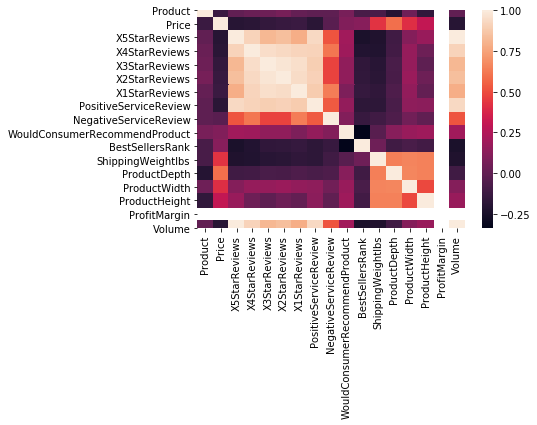

In [11]:
corr = productos.corr()
sns.heatmap(corr)

### Tipos de relación
- -1,00 = Correlación negativa perfecta
- -0,90 = Correlación negativa muy fuerte
- -0,75 = Correlación negativa considerable
- -0,50 = Correlación negativa media
- -0,10 = Correlación negativa débil
- 0,00  = No existe correlación lineal alguna entre las variables
- 0,10  = Correlación positiva débil
- 0,50  = Correlación positiva media
- 0,75 = Correlación positiva considerable
- 0,90  = Correlación positiva muy fuerte
- 1,00  = Correlación positiva perfecta

In [12]:
#Dividir el conjunto de datos en uno de entrenamiento y otro de pruebas:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(productos[["PositiveServiceReview"]],productos[["Volume"]], test_size=0.3, random_state=1234)

>Es importante siempre validar los rangos de los conjuntos de datos creados, para evitar caer en extrapolación:

In [13]:
print("Entrenamiento dimensiones",X_train.shape)
print("Descripción")
X_train.describe

Entrenamiento dimensiones (44, 1)
Descripción


<bound method NDFrame.describe of     PositiveServiceReview
63                      3
10                      2
7                       5
27                      1
14                     57
17                      3
46                      4
31                      5
35                     15
1                       1
42                      7
62                      5
2                       1
39                      6
48                      0
60                      0
0                       2
11                      9
3                       7
61                      9
34                     60
37                      5
59                     14
9                       2
16                      0
5                      12
28                      1
58                      1
44                      4
51                      4
43                     12
30                      0
26                      1
41                     13
23                     42
49                      0
15  

In [14]:
print("Pruebas dimensiones",X_train.shape)
print("Descripción")
X_train.describe

Pruebas dimensiones (44, 1)
Descripción


<bound method NDFrame.describe of     PositiveServiceReview
63                      3
10                      2
7                       5
27                      1
14                     57
17                      3
46                      4
31                      5
35                     15
1                       1
42                      7
62                      5
2                       1
39                      6
48                      0
60                      0
0                       2
11                      9
3                       7
61                      9
34                     60
37                      5
59                     14
9                       2
16                      0
5                      12
28                      1
58                      1
44                      4
51                      4
43                     12
30                      0
26                      1
41                     13
23                     42
49                      0
15  

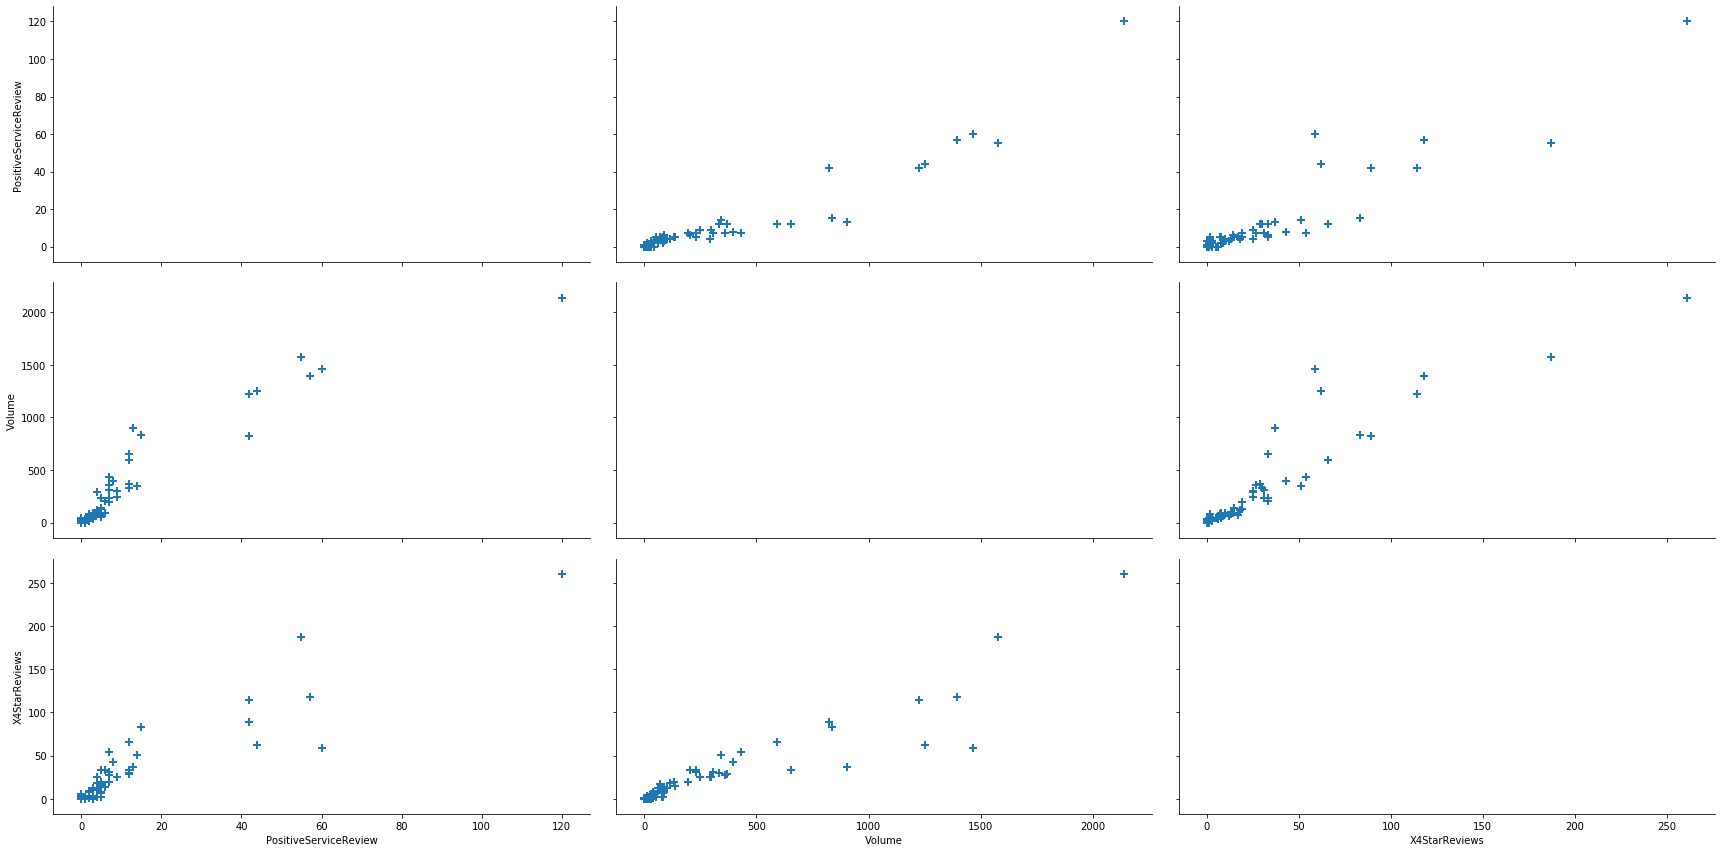

In [15]:
sns.pairplot(productos[["PositiveServiceReview","Volume","X4StarReviews"]], diag_kind="Volume", markers="+",
                  plot_kws=dict(s=50, edgecolor="b", linewidth=2),height=4, aspect=2,
                  diag_kws=dict(shade=True))
#sns.pairplot(productos, diag_kind="Volume", markers="+",
#                  plot_kws=dict(s=50, edgecolor="b", linewidth=1),
#                  diag_kws=dict(shade=True))
plt.show()

## Modelo de Machine Learning

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

##### Regresion Lineal

In [16]:
#Generar el modelo de regresión lineal
regr = linear_model.LinearRegression()

In [17]:
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

In [19]:
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

Mean squared error: 18050.15


In [20]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [[25.05614894]]
Independent term: 
 [41.68820546]
Mean squared error: 18050.15
Variance score: 0.87


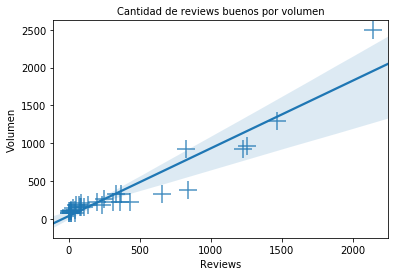

In [21]:
# 3. Check the scoreplt.figure(num=3, figsize=(20, 10), dpi=90, facecolor='w', edgecolor='aqua')

sns.regplot(y_train, np.squeeze(np.asarray(y_pred)), data=productos[["PositiveServiceReview","Volume"]], marker='+', scatter_kws={"s": 350})

SIZE2=10  
plt.rc('xtick', labelsize=SIZE2)    # fontsize of the tick X labels 
plt.rc('ytick', labelsize=SIZE2)    # fontsize of the tick Y labels


plt.title('Cantidad de reviews buenos por volumen', size=10)
plt.xlabel('Reviews', size=10)
plt.ylabel('Volumen', size=10)
plt.show()


Calidad del modelo de machine learning

In [21]:
regr.score(X_test, y_test)

0.83971754303708

In [22]:
#Predicciones 
prediccion=regr.predict(productos_nuevos[["PositiveServiceReview"]])

dada=np.hstack((productos_nuevos[["Product"]],np.around(prediccion,decimals=2)))
dada
#y_pred

array([[ 171.  ,  342.36],
       [ 172.  ,  217.08],
       [ 173.  ,  317.31],
       [ 175.  ,   91.8 ],
       [ 176.  ,   41.69],
       [ 178.  ,   91.8 ],
       [ 180.  ,  743.26],
       [ 181.  ,  166.97],
       [ 183.  ,   66.74],
       [ 186.  ,  743.26],
       [ 187.  , 2296.74],
       [ 193.  ,  242.14],
       [ 194.  ,  392.47],
       [ 195.  ,  141.91],
       [ 196.  ,  166.97],
       [ 201.  ,   66.74],
       [ 199.  ,  843.48]])

## Resultados
En conclusión, los valores obtenidos por la modelación de regresión lineal simple en los datos que se estudiaron 
pueden establecerse comobuenos, debido a que el total de las observaciones que puede predecir correctamente es de alrededor
del 77% de la observaciones. Por lo que se recomienda utilizar el modelo generado para predecir el volumen de compras de la empresa